

## 1. Import libraries

In [3]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, Subset
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

## 2. Load dataset

In [43]:
dataframe = pd.read_csv(os.path.join(os.getcwd(), 'sleep_cycle_productivity.csv'))
dataframe.head(3)

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10


## 3. Preprocess data

In [44]:
scaler = MinMaxScaler()

dataframe = pd.get_dummies(dataframe, columns=['Gender'])

dataframe_not_normalized = dataframe[['Gender_Female', 'Gender_Male', 'Gender_Other']]
dataframe_need_normalized = dataframe.drop(columns=['Gender_Female', 'Gender_Male', 'Gender_Other', 'Date', 'Person_ID'])

dataframe_need_normalized = pd.DataFrame(scaler.fit_transform(dataframe_need_normalized), columns=dataframe_need_normalized.columns)

preprocessed_dataframe = pd.concat([dataframe_not_normalized, dataframe_need_normalized], axis=1)
preprocessed_dataframe.head()

,Gender_Female,Gender_Male,Gender_Other,Age,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,False,False,True,0.341463,0.836683,0.457111,0.156,0.222222,0.966292,0.290970,0.648045,0.601176,0.777778,0.222222,0.555556
1,True,False,False,0.560976,0.256281,0.211061,0.182,0.444444,0.359551,0.070234,0.491620,0.291254,1.000000,0.222222,0.666667
2,False,True,False,0.048780,0.527638,0.326185,0.170,0.666667,0.191011,0.294314,0.329609,0.563345,1.000000,0.888889,1.000000
3,False,False,True,0.463415,0.778894,0.687359,0.610,0.777778,0.516854,0.113712,0.446927,0.258802,0.777778,0.333333,0.111111
4,False,False,True,0.682927,0.356784,0.407449,0.450,1.000000,0.685393,0.899666,0.525140,0.921973,0.777778,0.666667,0.888889


## 4. Feature Selections (Optional)

### 4.1 Productivity Score

In [ ]:
X = preprocessed_dataframe.drop(columns=['Productivity Score', 'Mood Score', 'Stress Level'])
y_productivity = preprocessed_dataframe['Productivity Score']

X_train, X_test, y_train, y_test = train_test_split(X, y_productivity, test_size=0.2, random_state=42)

features = X.columns

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_coeff = lr.coef_
print("Linear Regression Coefficients for Productivity Score:")
for feature, coef in zip(features, lr_coeff):
    print(f"  {feature}: {coef}")

Linear Regression Coefficients for Productivity Score:
  Gender_Female: 0.006947800560104921
  Gender_Male: -0.00400002504379151
  Gender_Other: -0.0029477755156838447
  Age: -0.00800876732822004
  Sleep Start Time: 3.1583691790096915
  Sleep End Time: -6.98395957823645
  Total Sleep Hours: 3.939037478184522
  Sleep Quality: -0.002664229015419918
  Exercise (mins/day): -0.01405048528138861
  Caffeine Intake (mg): 0.009565601057638661
  Screen Time Before Bed (mins): 0.002321548650493975
  Work Hours (hrs/day): -0.016370518554255465


### 4.2 Mood Score

In [ ]:
X = preprocessed_dataframe.drop(columns=['Productivity Score', 'Mood Score', 'Stress Level'])
y_productivity = preprocessed_dataframe['Mood Score']

X_train, X_test, y_train, y_test = train_test_split(X, y_productivity, test_size=0.2, random_state=42)

features = X.columns

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_coeff = lr.coef_
print("Linear Regression Coefficients for Mood Score:")
for feature, coef in zip(features, lr_coeff):
    print(f"  {feature}: {coef}")

Linear Regression Coefficients for Mood Score:
  Gender_Female: -0.008743438333590727
  Gender_Male: 0.0032830717721986646
  Gender_Other: 0.005460366561086219
  Age: 0.0062773640324194305
  Sleep Start Time: -1.5480667412800777
  Sleep End Time: 3.3816670145217844
  Total Sleep Hours: -1.9223891727605409
  Sleep Quality: -0.008814902899624319
  Exercise (mins/day): -0.008465797491932327
  Caffeine Intake (mg): 0.0013783802735703875
  Screen Time Before Bed (mins): -0.010366029921560837
  Work Hours (hrs/day): 0.020523091615322103


### 4.3 Stress Level

In [ ]:
X = preprocessed_dataframe.drop(columns=['Productivity Score', 'Mood Score', 'Stress Level'])
y_productivity = preprocessed_dataframe['Stress Level']

X_train, X_test, y_train, y_test = train_test_split(X, y_productivity, test_size=0.2, random_state=42)

features = X.columns

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_coeff = lr.coef_
print("Linear Regression Coefficients for Stress Level:")
for feature, coef in zip(features, lr_coeff):
    print(f"  {feature}: {coef}")

Linear Regression Coefficients for Stress Level:
  Gender_Female: 0.00034212137731580086
  Gender_Male: 0.00352335641802609
  Gender_Other: -0.0038654777964136928
  Age: -0.02037061768960545
  Sleep Start Time: -5.319011699740611
  Sleep End Time: 11.911213592793214
  Total Sleep Hours: -6.714466303971049
  Sleep Quality: -0.014768466854850127
  Exercise (mins/day): -0.016920193202166672
  Caffeine Intake (mg): 0.01518328836901855
  Screen Time Before Bed (mins): -0.010901610013201658
  Work Hours (hrs/day): 0.017806232521313844


## 5. K Nearest Neighbors Visualization

In [45]:
features = ["Gender_Female", "Gender_Male", "Gender_Other", "Age", "Sleep Start Time", "Sleep End Time", "Total Sleep Hours", "Sleep Quality", "Exercise (mins/day)", "Caffeine Intake (mg)", "Screen Time Before Bed (mins)", "Work Hours (hrs/day)"]
targets = ['Productivity Score', 'Mood Score', 'Stress Level']

features_dic = {i+1: f for i, f in enumerate(features)}
targets_dic = {i+1: t for i, t in enumerate(targets)}

print('Features in the dataset:')
for i, f in enumerate(features):
    print(f'\t{i+1}: {f}')

print('\nTargets in the dataset:')
for i, t in enumerate(targets):
    print(f'\t{i+1}: {t}')

Features in the dataset:
	1: Gender_Female
	2: Gender_Male
	3: Gender_Other
	4: Age
	5: Sleep Start Time
	6: Sleep End Time
	7: Total Sleep Hours
	8: Sleep Quality
	9: Exercise (mins/day)
	10: Caffeine Intake (mg)
	11: Screen Time Before Bed (mins)
	12: Work Hours (hrs/day)

Targets in the dataset:
	1: Productivity Score
	2: Mood Score
	3: Stress Level


In [47]:
FEATURE_1 = 'Caffeine Intake (mg)' # Choose one of the features from above
FEATURE_2 = 'Total Sleep Hours' # Choose one of the features from above
TARGET = 'Productivity Score' # Choose one of the targets from above
SPLIT_POINT = 5 # Split point for binary classification
STANDARD_SCALING = True # Choose True or False for standard scaling the features

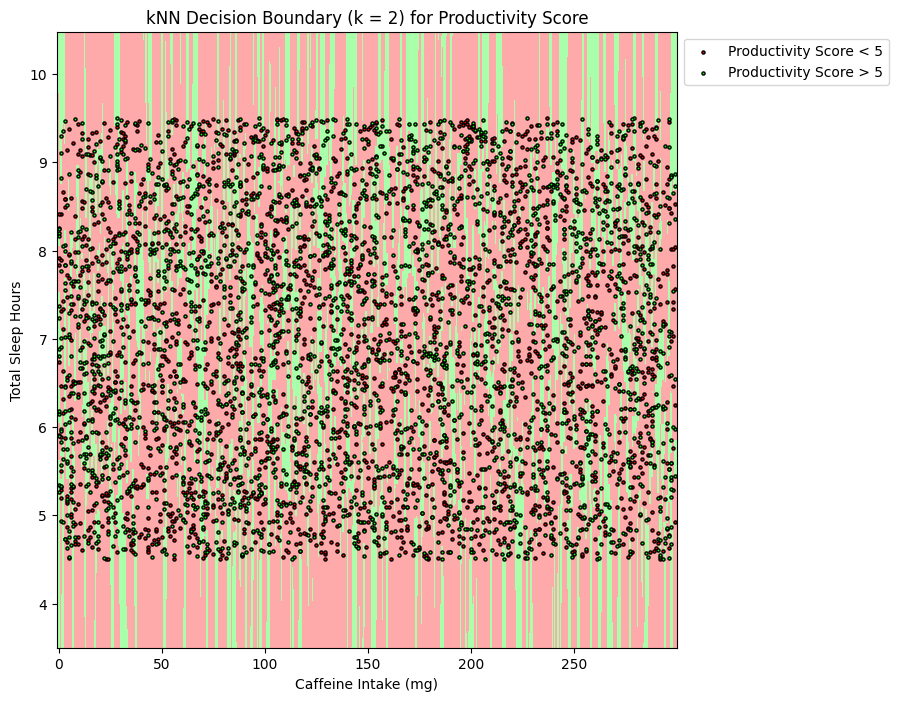

In [48]:
scaler = StandardScaler()

X = dataframe[[FEATURE_1, FEATURE_2]].to_numpy()
X = scaler.fit_transform(X) if STANDARD_SCALING else X
y = pd.cut(dataframe[TARGET], bins=[0, SPLIT_POINT, 10], labels=[0, 1]).to_numpy()


# Create mesh grid for plotting decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Train kNN classifier
n_neighbors = 2
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X, y)

# Predict the class for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00'])

# Plot decision boundary
plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[y==0, 0], X[y==0, 1],
            c=cmap_bold.colors[0], edgecolor='k', s=5, label=f'{TARGET} < {SPLIT_POINT}')
plt.scatter(X[y==1, 0], X[y==1, 1],
            c=cmap_bold.colors[1], edgecolor='k', s=5, label=f'{TARGET} > {SPLIT_POINT}')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(FEATURE_1)
plt.ylabel(FEATURE_2)
plt.title(f"kNN Decision Boundary (k = {n_neighbors}) for {TARGET}")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## 5. K Nearest Neighbors Model

In [49]:
SPLIT_POINT = 5 # Split point for binary classification
NUM_FOLDS = 5 # Number of folds for cross-validation
TARGET = 'Mood Score' # Choose from ['Productivity Score', 'Mood Score', 'Stress Level']

In [50]:
X = preprocessed_dataframe.drop(columns=['Productivity Score', 'Mood Score', 'Stress Level']).to_numpy().astype(np.float32)
y = pd.cut(dataframe[TARGET], bins=[0, SPLIT_POINT, 10], labels=[0, 1]).to_numpy()

# Define the KNN model
k = 2  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X, y, cv=NUM_FOLDS)

# Print accuracy results
print(f'Cross-validation accuracies of {NUM_FOLDS} folds: {cv_scores}')
print(f'Mean accuracy: {np.mean(cv_scores) * 100:.2f}%')


Cross-validation accuracies of 5 folds: [0.498 0.537 0.514 0.513 0.517]
Mean accuracy: 51.58%


## 6. Neural Network Model

In [51]:
HIDDEN_DIM = 128
NUM_EPOCHS = 30
BATCH_SIZE = 16
LEARNING_RATE = 0.001 
PATIENCE_EARLY_STOPPING = 3
SPLIT_POINT = 5
NUM_FOLDS = 5
TARGET = 'Mood Score' # Choose from ['Productivity Score', 'Mood Score', 'Stress Level']

In [52]:
X = preprocessed_dataframe.drop(columns=['Productivity Score', 'Mood Score', 'Stress Level']).to_numpy().astype(np.float32)
y = pd.cut(dataframe[TARGET], bins=[0, SPLIT_POINT, 10], labels=[0, 1]).to_numpy()


X_tensor = torch.from_numpy(X.astype(np.float32))   # features as floats
y_tensor = torch.from_numpy(y.astype(np.int64))  # labels as long integers for classification

# Create a TensorDataset
dataset = TensorDataset(X_tensor, y_tensor)

# Determine the number of classes and other dimensions
num_classes = len(np.unique(y))
input_dim = X_tensor.shape[1]

# Define a simple feedforward neural network
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes, dropout_prob=0.2):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.LeakyReLU()
        self.dropout = nn.Dropout(p=dropout_prob)  # Dropout layer
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout after activation
        x = self.fc2(x)
        return x


# Set up K-Fold Cross Validation
kfold = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=42)
fold_results = {}

# K-Fold Cross Validation model training
for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
    print(f'Fold {fold+1}/{NUM_FOLDS}')

    # Create subsets for training and validation
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    train_loader = DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=BATCH_SIZE, shuffle=False)

    # Initialize a new instance of the model, loss function, and optimizer for each fold
    model = Net(input_dim, HIDDEN_DIM, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    best_val_accuracy = 0.0
    early_stop_counter = 0

    # Training loop for the current fold
    for epoch in range(NUM_EPOCHS):
        model.train()
        running_loss = 0.0

        for data, tgt in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, tgt)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * data.size(0)

        epoch_loss = running_loss / len(train_subset)

        # Evaluation on the validation set
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data, tgt in val_loader:
                outputs = model(data)
                _, predicted = torch.max(outputs, 1)
                total += tgt.size(0)
                correct += (predicted == tgt).sum().item()

        accuracy = correct / total
        print(f"Fold {fold+1}, Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {epoch_loss:.4f}, Validation Accuracy: {accuracy:.4f}")

        # Check for improvement in validation accuracy
        if accuracy > best_val_accuracy:
            best_val_accuracy = accuracy
            early_stop_counter = 0  # Reset counter if improvement is seen
        else:
            early_stop_counter += 1

        # If no improvement for 'patience' epochs, stop training early
        if early_stop_counter >= PATIENCE_EARLY_STOPPING:
            print(f"Early stopping triggered at epoch {epoch+1}. Best Validation Accuracy: {best_val_accuracy:.4f}\n")
            break

    fold_results[fold] = best_val_accuracy

total_acc = 0
# Print overall K-Fold Cross Validation results
print("K-Fold Cross Validation results:")
for fold, acc in fold_results.items():
    print(f"Fold {fold+1}: {acc:.4f}")
    total_acc += acc

print(f'Mean accuracy: {total_acc / NUM_FOLDS * 100:.2f}%')
print("Training complete")


Fold 1/5
Fold 1, Epoch [1/30], Loss: 0.6951, Validation Accuracy: 0.5080
Fold 1, Epoch [2/30], Loss: 0.6943, Validation Accuracy: 0.5080
Fold 1, Epoch [3/30], Loss: 0.6930, Validation Accuracy: 0.5010
Fold 1, Epoch [4/30], Loss: 0.6926, Validation Accuracy: 0.4950
Early stopping triggered at epoch 4. Best Validation Accuracy: 0.5080

Fold 2/5
Fold 2, Epoch [1/30], Loss: 0.6959, Validation Accuracy: 0.5270
Fold 2, Epoch [2/30], Loss: 0.6944, Validation Accuracy: 0.5290
Fold 2, Epoch [3/30], Loss: 0.6949, Validation Accuracy: 0.5230
Fold 2, Epoch [4/30], Loss: 0.6920, Validation Accuracy: 0.5190
Fold 2, Epoch [5/30], Loss: 0.6917, Validation Accuracy: 0.4880
Early stopping triggered at epoch 5. Best Validation Accuracy: 0.5290

Fold 3/5
Fold 3, Epoch [1/30], Loss: 0.6946, Validation Accuracy: 0.4990
Fold 3, Epoch [2/30], Loss: 0.6943, Validation Accuracy: 0.4850
Fold 3, Epoch [3/30], Loss: 0.6931, Validation Accuracy: 0.5160
Fold 3, Epoch [4/30], Loss: 0.6933, Validation Accuracy: 0.5130